# Trajectory path prediction
## Basic trajectory path prediction using RNN,LSTM
#### Author: Ratul Sikder
#### Gmail: ratulsikder104@gmail.com
##### Project target: 
Dataset contain X and Y coordinates  of a projectile of <b>Golf ball </b>.Here target is to find future path of the projected object.
##### Approach:
Trajectory is the path of projectile motion of object. It can be categetoried as <b>Time Series Analysis</b>.So, in this peoject RNN-LSTM model is build with one Input layer, one LSTM hidden layer and one output layer. As activation function, here I use tanh function.

In [2]:
#Import essential modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


## Dataset Import

In [3]:
dataset = pd.read_csv("trag45.csv")
print("Dataset Shape ",dataset.shape)
print("First 5 dataset\n",dataset.head())

Dataset Shape  (1443, 5)
First 5 dataset
    init_angle  init_speed         X         Y  time
0        45.0       100.0  0.000000  0.000000  0.00
1         NaN         NaN  0.707107  0.706127  0.01
2         NaN         NaN  1.414214  1.411274  0.02
3         NaN         NaN  2.121320  2.115440  0.03
4         NaN         NaN  2.828427  2.818627  0.04


# #Plot x - y graph

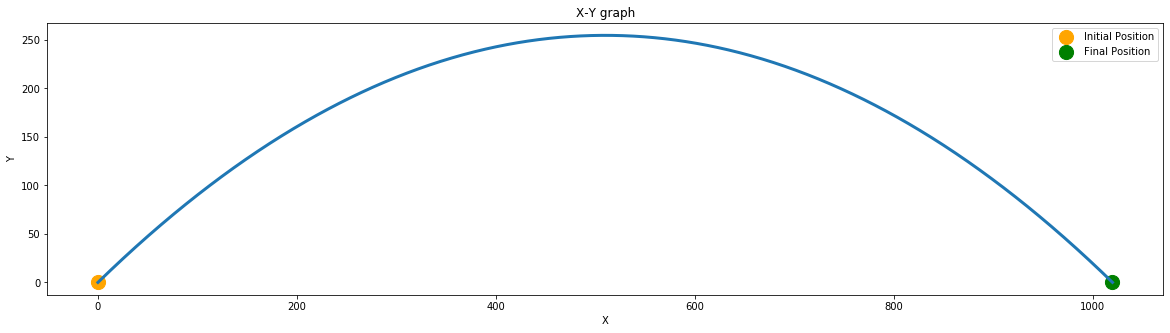

In [4]:
plt.figure(figsize=(20,5))

plt.scatter(dataset['X'][0],dataset['Y'][0],color='orange', label='Initial Position',s=200.0)
plt.scatter(dataset['X'][dataset.shape[0]-1],dataset['Y'][dataset.shape[0]-1],color='g',label='Final Position',s=200.0)

plt.plot(dataset['X'],dataset['Y'],lw=(3.0))

plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y graph")
plt.legend()

## #Dataset Preprocessing

In [5]:
#select only y coordinates. Because x is linear
selectedData = dataset[['Y']].values
selectedData = selectedData.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaledData = scaler.fit_transform(selectedData)

## Scaled data plot

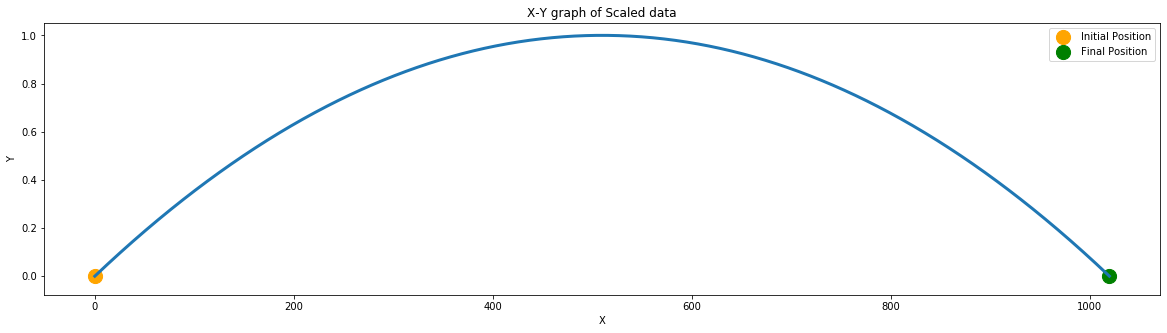

In [7]:
plt.figure(figsize=(20,5))

plt.scatter(dataset['X'][0],scaledData[0],color='orange', label='Initial Position',s=200.0)
plt.scatter(dataset['X'][dataset.shape[0]-1],scaledData[-1],color='g',label='Final Position',s=200.0)

plt.plot(dataset['X'],scaledData,lw=(3.0))

plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y graph of Scaled data")
plt.legend()

### #Split train and test data

In [8]:
# split into train and test sets
train_size = int(len(scaledData) * 0.67)
test_size = len(scaledData) - train_size

train, test = scaledData[0:train_size,:], scaledData[train_size:len(scaledData),:]

print("Training data size %d\n"%len(train),"Testing data size %d\n"% len(test))

Training data size 966
 Testing data size 477



### Memory section of the data model

In [9]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
#set lookback to 20 prev output
look_back = 20

#traing data preparation
trainX, trainY = create_dataset(train, look_back)
#test data preparation
testX, testY = create_dataset(test, look_back)

print("Traing data shape dim:", trainX.shape)
print("Test data shape dim:", testX.shape)

Traing data shape dim: (945, 20)
Test data shape dim: (456, 20)


In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],  look_back,1))
testX = np.reshape(testX, (testX.shape[0],look_back, 1))


## Model 
<ul>
    <li>Layer Quantity : 3</li>
    <li>Loss Function : Mean Squared Error</li>
    <li>Activation Fucntion: tanh(for all layer)</li>

</ul>

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(trainX.shape[1:]),activation='tanh'))
model.add(Dense(1,activation='tanh'))

#compile
model.compile(loss='mean_squared_error', optimizer='adam')
#fit
model.fit(trainX, trainY, epochs=200)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
945/945 [==============================] - 2s 2ms/step - loss: 0.2086
Epoch 2/200
945/945 [==============================] - 1s 730us/step - loss: 0.0431
Epoch 3/200
945/945 [==============================] - 1s 733us/step - loss: 0.0224
Epoch 4/200
945/945 [==============================] - 1s 720us/step - loss: 0.0171
Epoch 5/200
945/945 [==============================] - 1s 721us/step - loss: 0.0121
Epoch 6/200
945/945 [==============================] - 1s 731us/step - loss: 0.0078
Epoch 7/200
945/945 [==============================] - 1s 739us/step - loss: 0.0049
Epoch 8/200
945/945 [==============================] - 1s 723us/step - loss: 0.0034
Epoch 9/200
945/945 [==============================] - 1s 729us/step - loss: 0.0029
Epoch 10/200
945/945 [==============================] - 1s 727us/step - loss: 0.0025
Epoch 11/200
945/945 [===================

## #Results

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Error Score: %.2f RMSE' % (trainScore))
    
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Error Score: %.2f RMSE' % (testScore))

Train Error Score: 1.31 RMSE
Test Error Score: 4.98 RMSE


#### Plot results

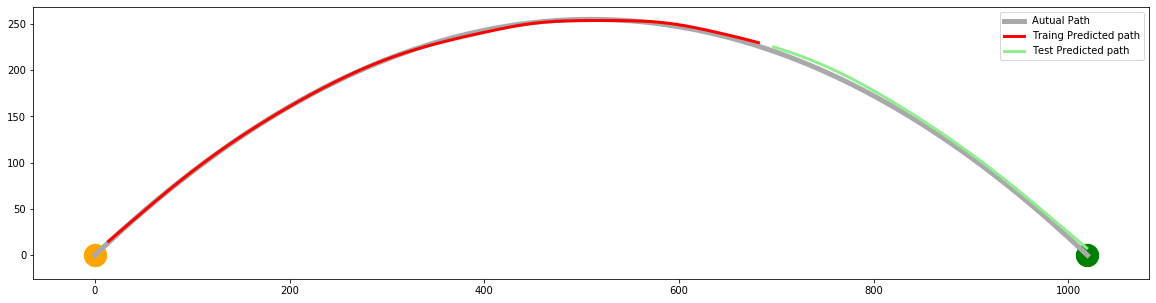

In [14]:
plt.figure(figsize=(20,5))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(scaledData)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaledData)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaledData)-1, :] = testPredict

# plot baseline and predictions

plt.plot(dataset['X'],scaler.inverse_transform(scaledData),label='Autual Path',lw=5.0,color="darkgray")
plt.plot(dataset['X'],trainPredictPlot,label='Traing Predicted path',lw=3.0,color="red")
plt.plot(dataset['X'],testPredictPlot,label='Test Predicted path',lw=3.0,color="lightgreen")
plt.legend()
plt.scatter(dataset['X'][0],dataset['Y'][0],color='orange', label='Initial Position',s=500.0)
plt.scatter(dataset['X'][dataset.shape[0]-1],scaledData[-1],color='g',label='Final Position',s=500.0)
plt.show()

<p style = "color:#003049"><b>Here we see that, model predict the projectile path perfectly with little error.</b></p>
<p style = "color:#06d6a0">Here will be show the prediction result with another tragectory dataset</p>

In [15]:
#import new data
newData = pd.read_csv("test.csv",usecols=[1])
newData = newData.values
newData = newData.astype('float32')

In [16]:
#normalize dataset
newData = scaler.fit_transform(newData)

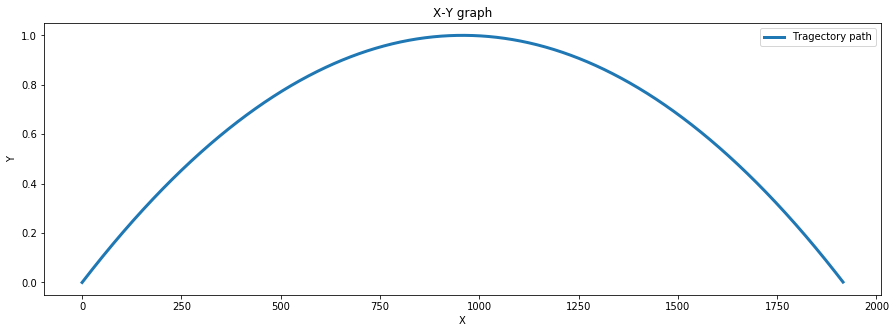

In [17]:
plt.figure(figsize=(15,5))



plt.plot(newData,lw=(3.0),label='Tragectory path')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y graph")
plt.legend()

In [18]:
train1, test1 = newData[0:train_size,:], newData[train_size:len(newData),:]
print("Training data size %d\n"%len(train1),"Testing data size %d\n"% len(test1))

Training data size 966
 Testing data size 951



In [19]:
look_back = 20

#traing data preparation
trainX1, trainY1 = create_dataset(train1, look_back)
#test data preparation
testX1, testY1 = create_dataset(test1, look_back)

print("Traing data shape dim:", trainX1.shape)
print("Test data shape dim:", testX1.shape)

Traing data shape dim: (945, 20)
Test data shape dim: (930, 20)


In [20]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX1, (trainX1.shape[0],  look_back,1))
testX1 = np.reshape(testX1, (testX1.shape[0],look_back, 1))

In [21]:
trainPredict1 = model.predict(trainX1)
testPredict1 = model.predict(testX1)

# invert predictions
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([trainY1])

testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([testY1])

# calculate root mean squared error
trainScore1 = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train Score: %.2f RMSE' % (trainScore1))

testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test Score: %.2f RMSE' % (testScore1))

Train Score: 1.66 RMSE
Test Score: 6.55 RMSE


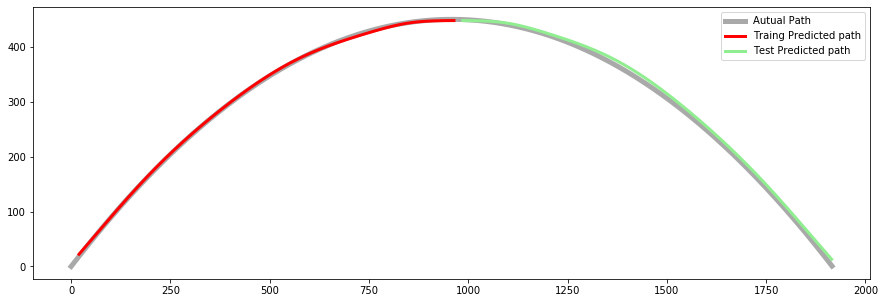

In [22]:
plt.figure(figsize=(15,5))

# shift train predictions for plotting
trainPredictPlot1 = np.empty_like(newData)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(trainPredict1)+look_back, :] = trainPredict1
# shift test predictions for plotting
testPredictPlot1 = np.empty_like(newData)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(trainPredict1)+(look_back*2)+1:len(newData)-1, :] = testPredict1
# plot baseline and predictions


plt.plot(scaler.inverse_transform(newData),label='Autual Path',lw=5.0,color="darkgray")
plt.plot(trainPredictPlot1,label='Traing Predicted path',lw=3.0,color="red")
plt.plot(testPredictPlot1,label='Test Predicted path',lw=3.0,color="lightgreen")
plt.legend()
plt.show()

<p style = "color:#118ab2">Here also model predict perfectly </p>